# Heart Disease UCI Project - Classification

For this project we will be exploring publicly available data from https://www.kaggle.com/ronitf/heart-disease-uci.

Context
This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them.  The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.

Content

Attribute Information: 
age -age in years
sex-(1 = male; 0 = female)
cp- chest pain type
trestbps- resting blood pressure (in mm Hg on admission to the hospital)
chol -serum cholestoral in mg/dl
fbs -(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
restecg -resting electrocardiographic results
thalach- maximum heart rate achieved
exang- exercise induced angina (1 = yes; 0 = no)
oldpeak- ST depression induced by exercise relative to rest
slope- the slope of the peak exercise ST segment
ca - number of major vessels (0-3) colored by flourosopy
thal-  3 = normal; 6 = fixed defect; 7 = reversable defect
target - 1 or 0
The names and social security numbers of the patients were recently removed from the database, replaced with dummy values. One file has been "processed", that one containing the Cleveland database. All four unprocessed files also exist in this directory.



Inspiration
Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Get the Data

In [2]:
data=pd.read_csv('heart.csv')

In [12]:
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [ ]:
#no empty columns

In [11]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Exploratory Data Analysis

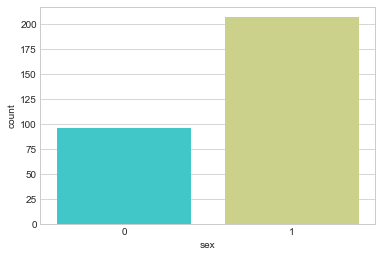

In [20]:
sns.set_style('whitegrid')
sns.countplot(x='sex',data=data,palette='rainbow')


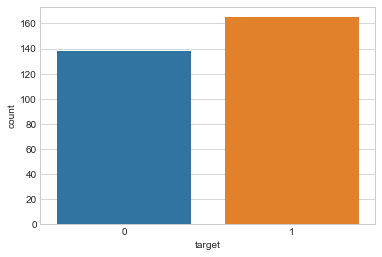

In [21]:
sns.countplot(x='target',data=data)

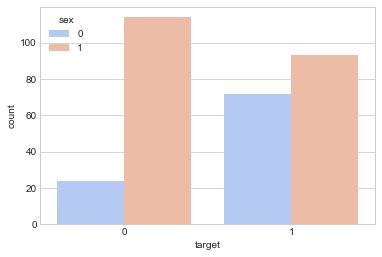

In [92]:
sns.countplot(x='target',data=data,hue='sex',palette='coolwarm')

C:\Users\nsever\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


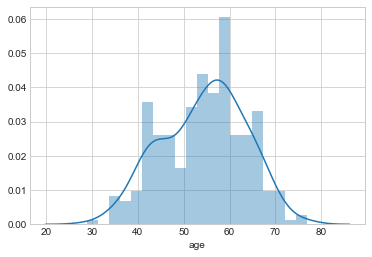

In [28]:
sns.distplot(data['age'],bins=20)


C:\Users\nsever\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\nsever\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


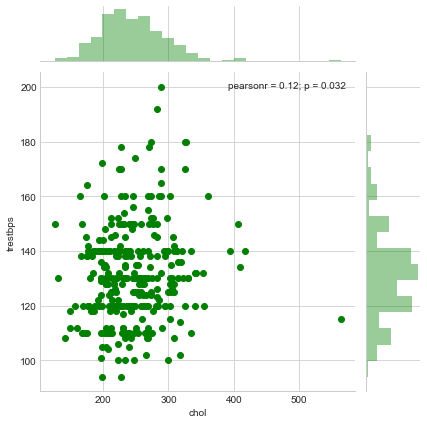

In [93]:

sns.jointplot(x='chol',y='trestbps',data=data,kind='scatter',color='green')

C:\Users\nsever\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\nsever\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


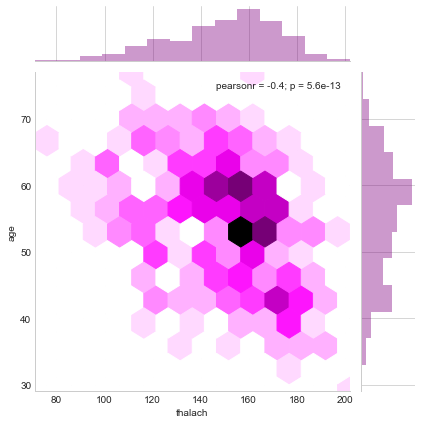

In [94]:
sns.jointplot(x='thalach',y='age',data=data,kind='hex',color='purple')

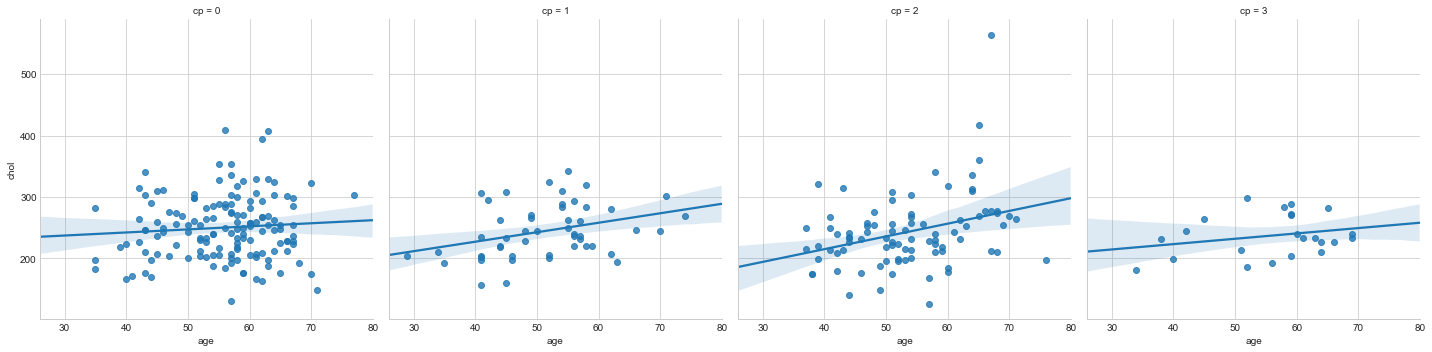

In [59]:
sns.lmplot(x='age',y='chol',data=data,col='cp')
plt.tight_layout()

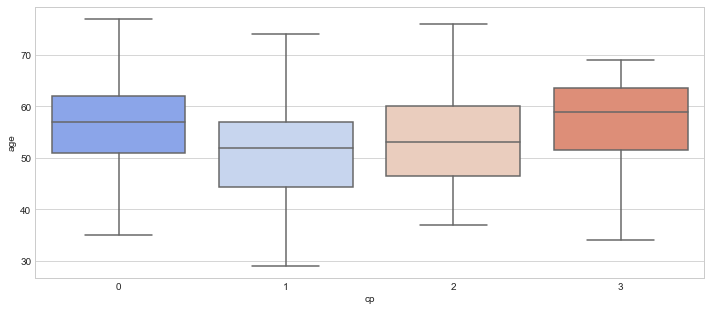

In [95]:
plt.figure(figsize=(12,5))
sns.boxplot(x='cp',y='age',data=data,palette='coolwarm')


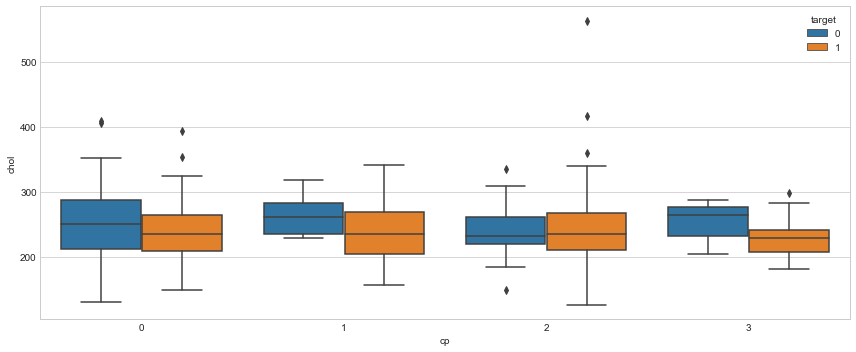

In [89]:
plt.figure(figsize=(12,5))
sns.boxplot(x='cp',y='chol',data=data,hue='target')
plt.tight_layout()


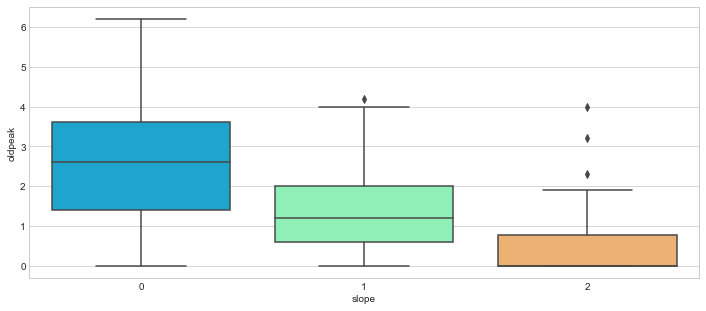

In [88]:
plt.figure(figsize=(12,5))
sns.boxplot(x='slope',y='oldpeak',data=data,palette='rainbow')

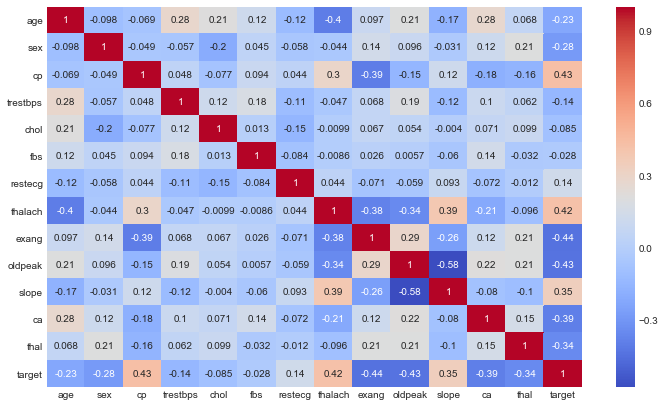

In [38]:
plt.figure(figsize=(12,7))
sns.heatmap(data.corr(),cmap='coolwarm',annot=True)

# Train Test Split

In [96]:
from sklearn.model_selection import train_test_split

In [128]:
X=data.drop('target',axis=1)
y=data['target']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.40, random_state=42)

# Training the Logistic Regression model

In [217]:
from sklearn.linear_model import LogisticRegression

In [225]:
logmodel=LogisticRegression()

In [226]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

# Predictions and Evaluation

Now create a classification report from the results

In [227]:
prediction=logmodel.predict(X_test)

In [221]:
print(accuracy_score(y_test,prediction))

0.8360655737704918


In [228]:
print(classification_report(y_test,prediction))

             precision    recall  f1-score   support

          0       0.81      0.81      0.81        52
          1       0.86      0.86      0.86        70

avg / total       0.84      0.84      0.84       122



In [229]:
print(confusion_matrix(y_test,prediction2))

[[42 10]
 [10 60]]


In [230]:
#Logistic Regression did not perform very well (0.836 accuracy score). More feature engineering needed. 
#I tried both Random Forest and Gradient Boosting to compare, both performed worse than Logistic Regression for this project. 